Copyright (c) 2019 OERCompBiomed (UiB)

<h1>Numpy</h1>

NumPy is the fundamental package needed for scientific computing with Python. NumPy arrays are like super-efficient containers for numbers that can handle lots of data at once. They're the top choice when you need to do math and science stuff with big piles of numbers

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers, with each dimension referred to as an axis.

For a comprehensive introduction and tutorial on NumPy see the NumPy Manual at https://docs.scipy.org/doc/numpy/index.html and the [NumPy User Guide](https://docs.scipy.org/doc/numpy/user/index.html)

Some of the following is taken from the Python / Numpy tutorial for the Stanford CS class CS231n (Convolutional Neural Networks for Visual Recognition): http://cs231n.github.io/python-numpy-tutorial 

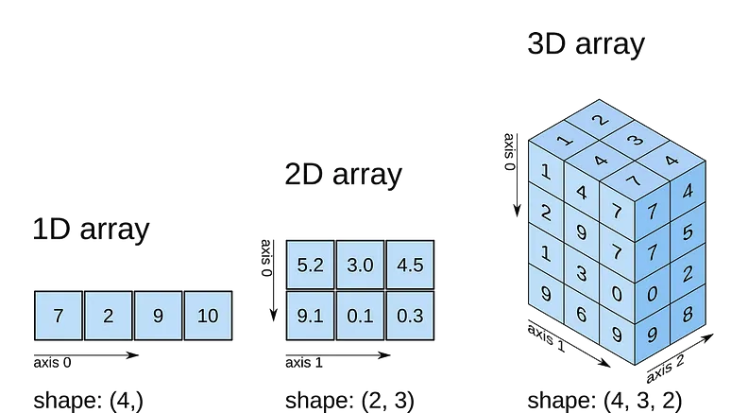

In [4]:
from PIL import Image
im = Image.open('./assets/numpy array.png')
im

<div class='alert alert-info'>
NOTE: The original notebook on Github might change over the time, and we recommend that you make a copy of our notebooks before you are editing them. In this respect you might adopt the naming convention my_<'name_of_notebook'>.ipynb, e.g. `my_1.1-numpy-basics.ipynb`

**You are encouraged to experiment with all our code!**

## Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the _rank_ of the array; the _shape_ of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [ ]:
import numpy as np

print(np.__version__)

### Create a vector
Passing in a list (or other similar collection) of numbers will yield a rank 1 array(1D array), i.e. *vector*.

In [ ]:
ls = [1,2,3]
print(ls, type(ls))

In [ ]:
a = np.array(ls)
print(a, type(a))

like the `len` function we used for lists, we use `.ndim` to get the rank of the array

In [ ]:
a.ndim

And `.shape` for the actual dimensions

In [ ]:
a.shape

The benefit of vectors versus lists is apparent anytime you wish to do any math operation. For instance, multiply each element by 3.

In [ ]:
print(ls*3) # this will not work because ls is a list
print(a*3) # this will work

Indexing an vector is just as you would expect

In [ ]:
a[0]

And you can change entries with the syntax you have seen before

In [ ]:
a[0] = 9
a

### Create a higher rank array (matrix).
The matrix is constructed by passing in a list of lists which can represent 2D, 3D arrays depending on the structure of the inner lists.

In [ ]:
lls = [[1,2], [15,16], [5,0]]
b = np.array(lls)
b

Now we have a rank 2 array (2D)

<div class='alert alert-warning'>
<h4>Exercise 1.</h4>a) Show that b has a rank = 2. What are the dimensions?

In [ ]:
#Ex1 a)


In [ ]:
# %load solutions/ex3_1a.py

Notice we describe the shape as (rows x columns)

Again, indexing is very straight forward, just pass for the row number, then the column number.

<div class='alert alert-warning'>
b. select the second entry int the bottom row of `b`.

In [ ]:
# b)


In [ ]:
# %load solutions/ex3_1b.py

### Numpy also provides many functions to create arrays:

In [ ]:
a = np.arange(5)          # Create a vector 0..4, similar to range
print(a)

In [ ]:
b = np.zeros((2,2))   # Create an array of all zeros
print(b)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

In [ ]:
c = np.ones((1,2))    # Create an array of all ones
print(c)              # Prints "[[ 1.  1.]]"

In [ ]:
d = np.full((2,2), 7)  # Create a constant array
print(d)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]

In [ ]:
e = np.eye(2)         # Create a 2x2 identity matrix
print(e)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]

In [ ]:
f = np.random.random((2,2))  # Create an array filled with random values
print(f)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

And finally you can "stretch out" any array into a 1D vector:

In [ ]:
print(e)
print(f'flattened: {e.flatten()}')

<div class='alert alert-warning'>
<h4>Exercise 2. </h4>Using the functions you learned so far, make an 5x5 array, all entries 7, except for the main diagonal which is 0

       [0., 7., 7., 7., 7.],
       [7., 0., 7., 7., 7.],
       [7., 7., 0., 7., 7.],
       [7., 7., 7., 0., 7.],
       [7., 7., 7., 7., 0.]]

In [ ]:
# Ex2


In [ ]:
# %load solutions/ex3_2.py

## Array indexing

Numpy offers several ways to index into arrays.

**Slicing**: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

Create the following rank 2 array with shape (3, 4)

$$\begin{bmatrix} 1 & 2 & 3 & 4 \\ 5 & 6 & 7 & 8 \\ 9 & 10 & 11 & 12 \end{bmatrix}$$

In [ ]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a

Use slicing to pull out the subarray consisting of the first 2 rows and columns 1 and 2; b is the following array of shape (2, 2):
$$\begin{bmatrix} 2 & 3 \\ 6 & 7  \end{bmatrix}$$

In [ ]:
b = a[:2, 1:3]
b

In [ ]:
# A slice of an array is a view into the same data, so modifying it
# will modify the original array.

print("a:\n", a) 

print("b:\n", b)

print(a[0, 1])   # Prints "2"

b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]

print(a[0, 1])   # After modification of b prints "77"

<div class='alert alert-warning'>
<h4>Exercise 3.</h4> Use slicing to select the (2x2) lower left corner of `a`.

In [ ]:
# Ex3


In [ ]:
# %load solutions/ex3_3.py

---
**Boolean array indexing**: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values of bool_idx

print(a[bool_idx])  # Prints "[3 4 5 6]"

In [ ]:
# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

we can also modify multiple values at once, for instance

In [ ]:
print(a)
a[:, 0] = [100,100,100]
a

Technical side note: because the slice of a is a shape (3,1), we must replace it with a vector of the same shape. However, you will notice that the following also works:

In [ ]:
print(a)
a[:, 0] = 50
a

This is because behind the scenes, numpy performs broadcasting, by inferring how best to fit them together when the shapes don't match. Beware of this!

<div class='alert alert-warning'>
<h4> Exercise 4.</h4>a. Make a function `make_zero` that takes an array A and an integer k,  and returns a copy of the array, but all values less than k are set to zero.

    
**NB!** We don't want you to change the array *inplace*. Instead, make a copy of A: `B = A.copy()`

In [ ]:
# Ex4 a)
def make_zero(A, k):
    

In [ ]:
# %load solutions/ex3_4a.py

In [ ]:
# test that it works
a = np.array([[1,2,3], [4, 5, 6], [7, 8, 9]])
print(a,'\n')
print(make_zero(a, 5))

<div class='alert alert-warning'>
b. Make a function 'invert' that sets all negative entries positive. 
e.g. calling it on 

    [[0,1],
    [-2,-4]]
should yield 

    [[0,1],
    [2,4]]

In [ ]:
# b)
def invert(A):

In [ ]:
# %load solutions/ex3_4b.py

In [ ]:
# test your function works as expected
a = np.arange(-8,8).reshape((4,4)) # array of 4x4 with values from -8 to 7
print(a)
invert(a)

## Datatypes

Unlike lists or dataframes, numpy arrays can only hold elements of a **single type**. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])   # Let numpy choose the default datatype
print(x.dtype)         # Prints "int32"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"

## Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

In [ ]:
# Elementwise sum; 
print(x + y)
print(np.add(x, y))

In [ ]:
# Elementwise difference; 
print(x - y)
print(np.subtract(x, y))

In [ ]:
# Elementwise product; 
print(x * y)
print(np.multiply(x, y))

In [ ]:
# Elementwise division; 
print(x / y)
print(np.divide(x, y))

In [ ]:
# Elementwise square root; 
print(np.sqrt(x))

Numpy provides many useful functions for performing computations on arrays; one of the most useful is sum:

In [ ]:
# make a new array
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"

In [ ]:
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the `T` attribute of an array object:

In [ ]:
x = np.array([[1,2], [3,4]])
print(x)        

In [ ]:
print(x.T)

In [ ]:
# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)  
print(v.T)

## Reshape

The `reshape` function - shapes an array without changing data of array.

In [ ]:
# create array of values 0-7
orig_array = np.arange(8) 
print("Original array : \n", orig_array) 

In [ ]:
# shape array with 2 rows and 4 columns 
array = orig_array.reshape(2, 4) 
print("\narray reshaped with 2 rows and 4 columns : \n", array)   

In [ ]:
# shape array with 2 rows and 4 columns 
array = orig_array.reshape(4 ,2) 
print("\narray reshaped with 2 rows and 4 columns : \n", array) 

In [ ]:
# Constructs 3D array 
array = orig_array.reshape(2, 2, 2) 
print("\nOriginal array reshaped to 3D : \n", array) 

<div class='alert alert-warning'>
<h4>Exercise 5</h4> Make a 5x5 matrix like below using `np.arange` and reshaping.

       [ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]]

In [ ]:
# Ex5


In [ ]:
# %load solutions/ex3_5.py

**We can use numpy's `where` function to find indices of array elements with a given value** 

In [ ]:
arr = np.array([[1, 4, 9], [1, 8, 27], [27, 16, 81]])
arr

In [ ]:
# Get the index of elements with value 27
result = np.where(arr == 27)
print(f'Tuple of arrays returned : [i j] ={result[0]},{result[1]}')

<div class='alert alert-info'>
    <b>The zip function</b> lets you iterate over multiple iterables simultaneously, like a zipper:
    

    list(zip('abc', 'zyx'))
    
    [('a', 'z'), ('b', 'y'), ('c', 'x')]
    
</div>

In [ ]:
# zip the 2 arrays to get the exact coordinates
listOfCoordinates= list(zip(result[0], result[1]))

**Now let’s iterate over the list of coordinates and print them i.e.**

In [ ]:
# iterate over the list of coordinates
for cord in listOfCoordinates:
    print(cord)

In [ ]:
print("*** Find the index of an element in 1D Numpy Array ***")

# Create a numpy array from a list of numbers
arr = np.array([11, 12, 13, 14, 15, 16, 17, 15, 11, 12, 14, 15, 16, 17])

# Get the index of elements with value 15
result = np.where(arr == 15)

result[0]

In [ ]:
# If given element doesn't exist in the array then it will return an empty array
result = np.where(arr == 111)
result

In [ ]:
print("*** Get the index of an element based on multiple conditions Numpy Array ***")
# Get the index of elements with value less than 16 and greater than 12
result = np.where((arr > 12) & (arr < 16))

result

## Comparing arrays

In [ ]:
A = np.arange(12).reshape((3,4))
B = A.copy()

Before you run the cell below: what datatype do you think the below code will yield?

In [ ]:
A == B

Probably not what you expected. Here the elements are compared one by one. The same applied for other comparators.

In [ ]:
A != B

How can you find out if the whole array is the same? Numpy has a built-in function for that:

In [ ]:
np.all(A == B)

and for times when we want to compare if two matrices are almost closely the same, we have a function for that too. This often arises with complicated functions where floating point errors sneak in.

In [ ]:
np.allclose(A, B)

we have another related function, `np.any` which will identify when at least one entry is True:

In [ ]:
# make arrays
A = np.arange(-8,8).reshape((4,4))
B = -A
print(A,'\n'); print(B)

In [ ]:
A == B

In [ ]:
np.any(A==B)

In [ ]:
np.any(A!=A)

<div class='alert alert-warning'>
<h4>Exercise 6.</h4> Make a function `similarity` that takes 2 arrays and returns the percent similarity of them (the percent of identical entries). It should yield 1 if all are the same and 0 if none are, 0.5 if half are the same etc.

Hint: it might be useful to know that you can convert between types using `array.astype()`.

In [ ]:
# Ex6


In [ ]:
# %load solutions/ex3_6.py

In [ ]:
# test your solution
a= np.array([1,8,3,9,4,9,3,8,1,2,3])
b= np.array([1,8,1,3,9,4,9,3,8,1,3])

similarity(a,b)

# Images as arrays

Once we have in place the idea of a grid of numbers, the leap is small to consider digital image processing - around which much of biomedical informatics is focused, such as computer aided diagnosis from MRIs.

The skills you acquire in this notebook are invaluable when working with medical images, and as you will see in machine learning, in particular artificial neural networks.

In [ ]:
# for visualization
from matplotlib import pyplot as plt

In [ ]:
arr = np.array([[1,0,1],[0,1,1],[1,1,0]])
arr

In [ ]:
plt.imshow(arr, cmap='gray')

As you see, the 1s are white, and 0s gray. Values in between become various shades of gray:

In [ ]:
# don't mind the code for plotting
arr = np.arange(100).reshape((10,10)) / 100
plt.figure(figsize=(8,8))
ax = plt.subplot()
ax.imshow(arr, 'gray')

for (j,i),label in np.ndenumerate(arr):
    ax.text(i,j,label,ha='center',va='center', c='m')

In [ ]:
from PIL import Image

In [6]:
im = Image.open('../assets/course_image_merja.jpg')

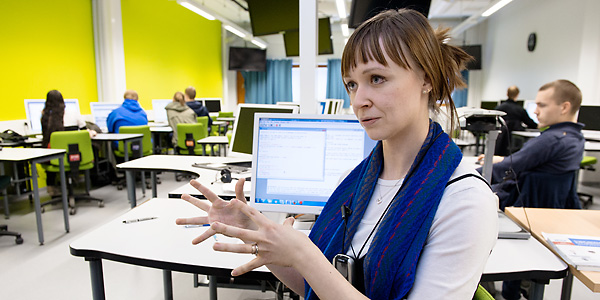

In [7]:
im

We can directly look at the pixel values of an image, but in this case the array is or rank 3, because we add an extra dimension to hold color information (Red,Green,Blue).

In [ ]:
arr = np.asarray(im)

In [ ]:
arr.shape

In [ ]:
print('reds: ', arr[:10, :10, 0]) # reds
print('greens: ', arr[:10, :10, 1]) # greens
print('blues: ', arr[:10, :10, 2]) # blues

<div class='alert alert-warning'>
<h4>Exercise 7.</h4> Plot upper left corner (100x100 pixels) using `plt.imshow`.

In [ ]:
# Ex7 a)


In [ ]:
# %load solutions/ex3_7a.py

<div class='alert alert-warning'>
b. are you able to compress the image by selecting only every fifth pixel?

**Hint:** observe how the code below behaves first

In [ ]:
b = np.arange(25)
b[::2]

In [ ]:
# b)


In [ ]:
# %load solutions/ex3_7b.py

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=174a646e-27d4-4666-a2b4-2d7bb1c47bf5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>